In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
trainData = pd.read_csv("mnist_train.csv")
testData = pd.read_csv("mnist_test.csv")
trainData.info(), testData.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Columns: 785 entries, 5 to 0.617
dtypes: int64(785)
memory usage: 359.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 785 entries, 7 to 0.667
dtypes: int64(785)
memory usage: 59.9 MB


In [3]:
# to access the data

trainData = np.array(trainData)
testData = np.array(testData)
trainData.shape, testData.shape

((59999, 785), (9999, 785))

In [4]:
trainY = trainData[:,0]
trainX = trainData[:,1:]/255.0   # normalizing

testY = testData[:,0]
testX = testData[:,1:]/255.0   # normalizing

In [5]:
trainY.shape, trainX.shape

((59999,), (59999, 784))

In [6]:
testY.shape, testX.shape

((9999,), (9999, 784))

In [8]:
# defining activation func

def sigmoid(x):
    res = 1/(1+np.exp(-x))
    return res

def sigmoid_prime(x):
    res = np.exp(-x)/(1+np.exp(-x))**2
    return res

def relu(x):
    return np.maximum(0, x)

def relu_prime(x):
    return np.where(x > 0, 1, 0)

In [9]:
# performing the activation

def activation(A,W,B):
    Z = np.matmul(W,A) + B
    Af = relu(Z) if W.shape[0] != 10 else sigmoid(Z)  # Use ReLU in hidden layers, sigmoid in output layer
    return Af,Z


In [10]:
# for forward propagation

def predict(X):
    global W0, W1, W2, W3, B0, B1, B2, B3
    H0, Z0 = activation(X, W0, B0)
    H1, Z1 = activation(H0, W1, B1)
    H2, Z2 = activation(H1, W2, B2)
    Y, Z3 = activation(H2, W3, B3)
    return Y


In [11]:
# req prediction for Y

def reqY(n):
    res = np.zeros([10])
    res[n] = 1.0
    return res

In [36]:
# initialising weights and biases for NN with two hidden layers with 16 neurons in each

'''
Random initialization might not be effective, especially with certain 
activation functions. Fix: Use a better weight initialization strategy, 
like Xavier initialization (for sigmoid or tanh) or He initialization (for ReLU)
'''

W0 = np.random.randn(56, 784) * np.sqrt(2. / 784)
B0 = np.zeros(56)

W1 = np.random.randn(16, 56) * np.sqrt(2. / 56)
B1 = np.zeros(16)

W2 = np.random.randn(16, 16) * np.sqrt(2. / 16)
B2 = np.zeros(16)

W3 = np.random.randn(10, 16) * np.sqrt(2. / 16)
B3 = np.zeros(10)



In [66]:
# loading the saved Ws and Bs

'''
W0 = np.load('W0.npy')
W1 = np.load('W1.npy')
W2 = np.load('W2.npy')
W3 = np.load('W3.npy')
B0 = np.load('B0.npy')
B1 = np.load('B1.npy')
B2 = np.load('B2.npy')
B3 = np.load('B3.npy')
'''    

"\nW0 = np.load('W0.npy')\nW1 = np.load('W1.npy')\nW2 = np.load('W2.npy')\nW3 = np.load('W3.npy')\nB0 = np.load('B0.npy')\nB1 = np.load('B1.npy')\nB2 = np.load('B2.npy')\nB3 = np.load('B3.npy')\n"

In [28]:
# getting the cost

def calcCost():
    global trainY,trainX,W0,W1,W2,W3,B0,B1,B2,B3
    cost = []
    for i in range(trainY.shape[0]):
        X = trainX[i,:]
        Y = predict(X)
        costt = (Y-reqY(trainY[i]))**2
        cost.append(costt.sum()/2)
    
    cost = np.array(cost)
    return cost.mean()

In [29]:
# The backpropagation algorithm to compute Cost gradient

def backProp(trainY,trainX):
    
    global W0,W1,W2,W3,B0,B1,B2,B3,dB3,dB2,dB1,dB0,dW3,dW2,dW1,dW0
    
    dB3 = dB2 = dB1 = dB0 = dW3 = dW2 = dW1 = dW0 = 0.0
    
    for i in range(trainY.shape[0]):
        X = trainX[i,:]
        Y_expected = reqY(trainY[i])
        H0,Z0 = activation(X, W0, B0)
        H1,Z1 = activation(H0, W1, B1)
        H2,Z2 = activation(H1,W2,B2)
        Y,Z3 = activation(H2,W3,B3)
        
        # getting deltas
        delta_Y = (Y-Y_expected)*sigmoid_prime(Z3)
        delta_H2 = np.matmul(W3.T,delta_Y)*relu_prime(Z2)
        delta_H1 = np.matmul(W2.T,delta_H2)*relu_prime(Z1)
        delta_H0 = np.matmul(W1.T,delta_H1)*relu_prime(Z0)
        
        # getting the delWs and delBs
        
        dB3 += delta_Y
        dB2 += delta_H2
        dB1 += delta_H1
        dB0 += delta_H0
        
        dW3 += np.outer(delta_Y,H2)
        dW2 += np.outer(delta_H2,H1)
        dW1 += np.outer(delta_H1,H0)
        dW0 += np.outer(delta_H0,X)
    
    
    dB3 = dB3/trainY.shape[0]
    dB2 = dB2/trainY.shape[0]
    dB1 = dB1/trainY.shape[0]
    dB0 = dB0/trainY.shape[0]
    
    dW3 = dW3/trainY.shape[0]
    dW2 = dW2/trainY.shape[0]
    dW1 = dW1/trainY.shape[0]
    dW0 = dW0/trainY.shape[0]

    return dW0, dW1, dW2, dW3, dB0, dB1, dB2, dB3


In [30]:
# updating the Ws and Bs

def updateParams(learning_rate, dW0, dW1, dW2, dW3, dB0, dB1, dB2, dB3):
    global W0,W1,W2,W3,B0,B1,B2,B3
    
    W3 -= learning_rate * dW3
    B3 -= learning_rate * dB3
    
    W2 -= learning_rate * dW2
    B2 -= learning_rate * dB2
    
    W1 -= learning_rate * dW1
    B1 -= learning_rate * dB1

    W0 -= learning_rate * dW0
    B0 -= learning_rate * dB0


In [31]:
# saving current Ws and Bs
def saveParams():
    global W0,W1,W2,W3,B0,B1,B2,B3
    np.save('W0.npy', W0)
    np.save('W1.npy', W1)
    np.save('W2.npy', W2)
    np.save('W3.npy', W3)
    np.save('B0.npy', B0)
    np.save('B1.npy', B1)
    np.save('B2.npy', B2)
    np.save('B3.npy', B3)

In [44]:
# for learning/training the model using all the data at once

learningRate = 2

for epoch in range(3):   # no of epoch
    dW0, dW1, dW2, dW3, dB0, dB1, dB2, dB3 = backProp(trainY,trainX)
    updateParams(learningRate, dW0, dW1, dW2, dW3, dB0, dB1, dB2, dB3)
    cost = calcCost()
    print(cost)

0.49458611375448447
0.49237575270539324
0.49136399219423416


In [62]:
# # for learning/training the model using Mini-Batch Stochastic Gradient Descent (SGD)

batch_size = 500
learning_rate = 0.1

prev_cost = 999999   # default high cost 

for epoch in range(50):   # no of epoch
    for i in range(0, trainX.shape[0], batch_size):
        X_batch = trainX[i:i+batch_size, :]
        Y_batch = trainY[i:i+batch_size]
        dW0, dW1, dW2, dW3, dB0, dB1, dB2, dB3 = backProp(Y_batch,X_batch)
        updateParams(learning_rate, dW0, dW1, dW2, dW3, dB0, dB1, dB2, dB3)
    cost = calcCost()
    
    if prev_cost<cost:
        break
    
    prev_cost = cost
    if epoch%10==0:
        saveParams()
        print(f"Epoch {epoch+1}, Cost: {cost}")

Epoch 1, Cost: 0.020685184856967447
Epoch 11, Cost: 0.019655224129185796
Epoch 21, Cost: 0.0187174328317083
Epoch 31, Cost: 0.017857917195570724
Epoch 41, Cost: 0.01707015721679957


In [20]:
# To test the performance on test data and plotting the confusion matrix

# Function to test on test data
def testAccuracy():
    global testX, testY
    correct_guesses = 0
    for i in range(testX.shape[0]):
        X = testX[i, :]
        Y_pred = predict(X)
        predicted_label = np.argmax(Y_pred)  # Get the index of the highest value
        if predicted_label == testY[i]:
            correct_guesses += 1
    
    accuracy = correct_guesses / testX.shape[0] * 100
    return correct_guesses, accuracy


# For Ploting the confusion matrix
def plot_confusion_matrix(cm, num_classes):
    fig, ax = plt.subplots(figsize=(8, 6))
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar(cax)
    
    # Set axis labels
    ax.set_xticks(np.arange(num_classes))
    ax.set_yticks(np.arange(num_classes))
    
    ax.set_xticklabels(range(num_classes))
    ax.set_yticklabels(range(num_classes))
    
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    for i in range(num_classes):
        for j in range(num_classes):
            ax.text(j, i, str(cm[i, j]), va='center', ha='center', color='red')
            
    plt.show()


In [68]:
# Test the accuracy after training

correct_guesses, accuracy = testAccuracy()
print(f"Correct guesses: {correct_guesses}")
print(f"Accuracy: {accuracy:.2f}%")

Correct guesses: 9652
Accuracy: 96.53%


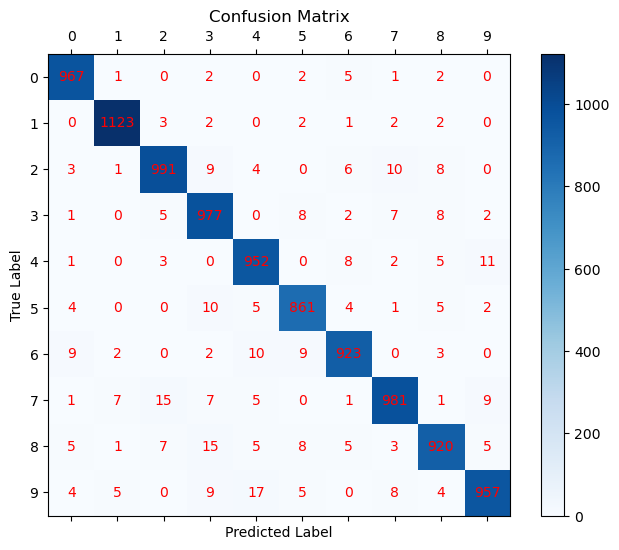

In [64]:
# plotting the confusion matrix

y_pred = np.array([np.argmax(predict(testX[i, :])) for i in range(testX.shape[0])])

num_classes = 10  # For MNIST, we have 10 classes (0-9)
conf_matrix = np.zeros((num_classes, num_classes), dtype=int)

# generating the confusion matrix
for i in range(len(testY)):
    true_label = testY[i]
    predicted_label = y_pred[i]
    conf_matrix[true_label, predicted_label] += 1

plot_confusion_matrix(conf_matrix, num_classes)
